In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Feature Engineering
- 'date_added' needs to be converted to datetime dtype.
- 'show_id' is a unique ID for each movie/TV Show.
- Nan needs to be checked.

In [4]:
# Strip leading white space before conversion
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")

#### Exploratory Analysis

In [5]:
# Top 10 directors with highest No. of movies
pd.DataFrame((df['director'].value_counts().head(10)).reset_index())

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


##### Date Range

In [6]:
print(f"Data is recorded from {df['release_year'].min()} to {df['release_year'].max()}.")

Data is recorded from 1925 to 2021.


#### Movie or TV Show ?

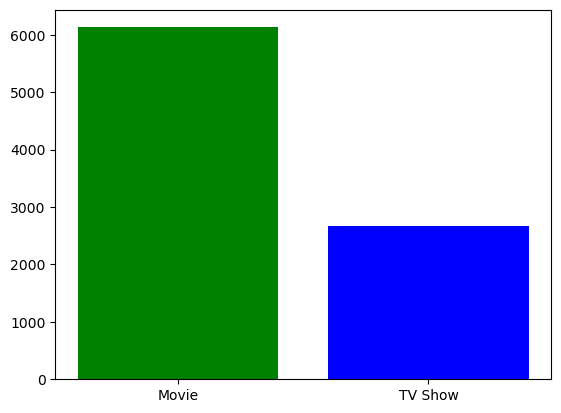

In [7]:
diff_types = df['type'].value_counts() 
plt.bar(x=diff_types.index, height=diff_types.values, color=['green', 'blue'])
plt.show()

#### Top 10 Countries

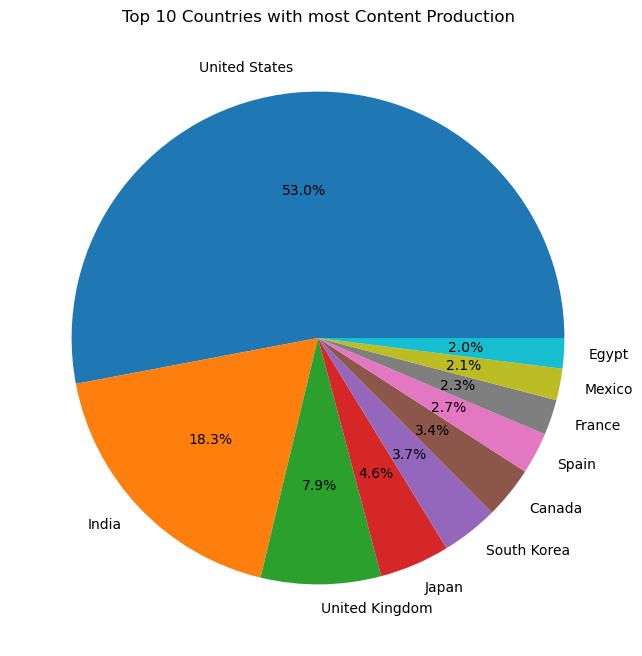

In [26]:
cnt_count = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(cnt_count.values, labels=cnt_count.index, autopct='%1.1f%%')
plt.title('Top 10 Countries with most Content Production')
plt.show()

#### Ratings Ditribution

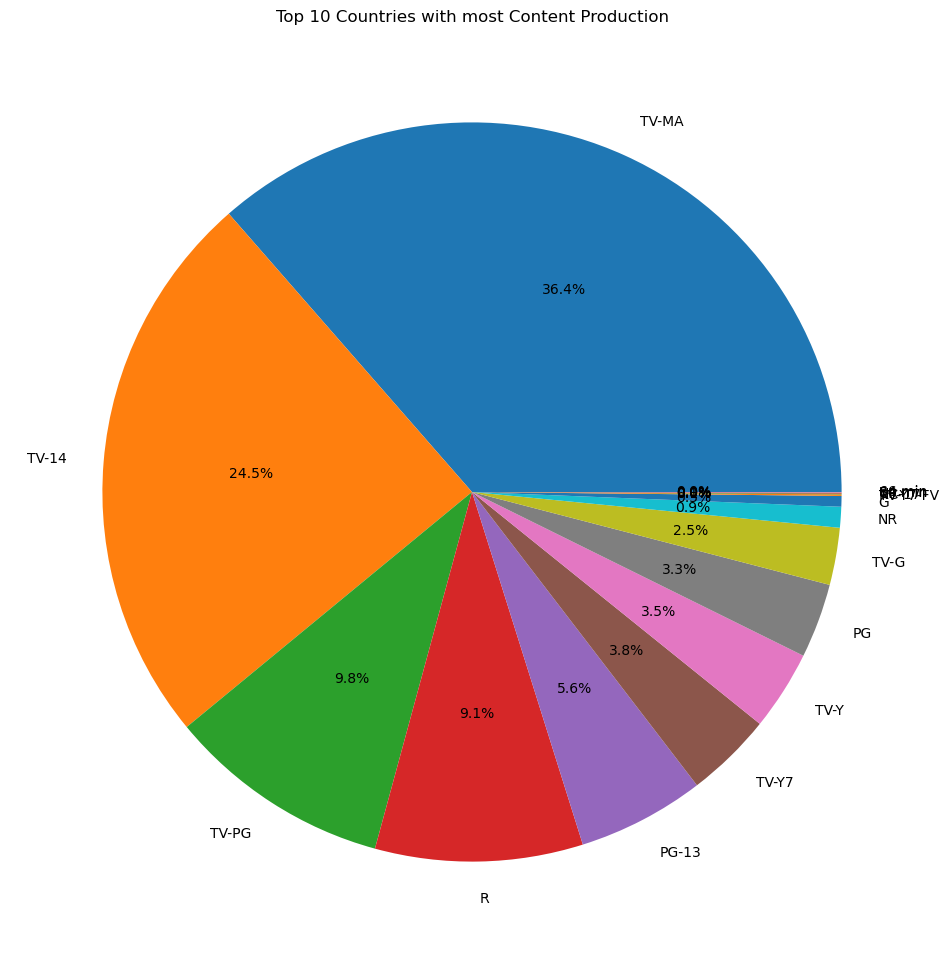

In [43]:
rating = df['rating'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(rating.values, labels=rating.index, autopct='%1.1f%%')
plt.title('Top 10 Countries with most Content Production')
plt.show()